In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, cos
from PIL import Image

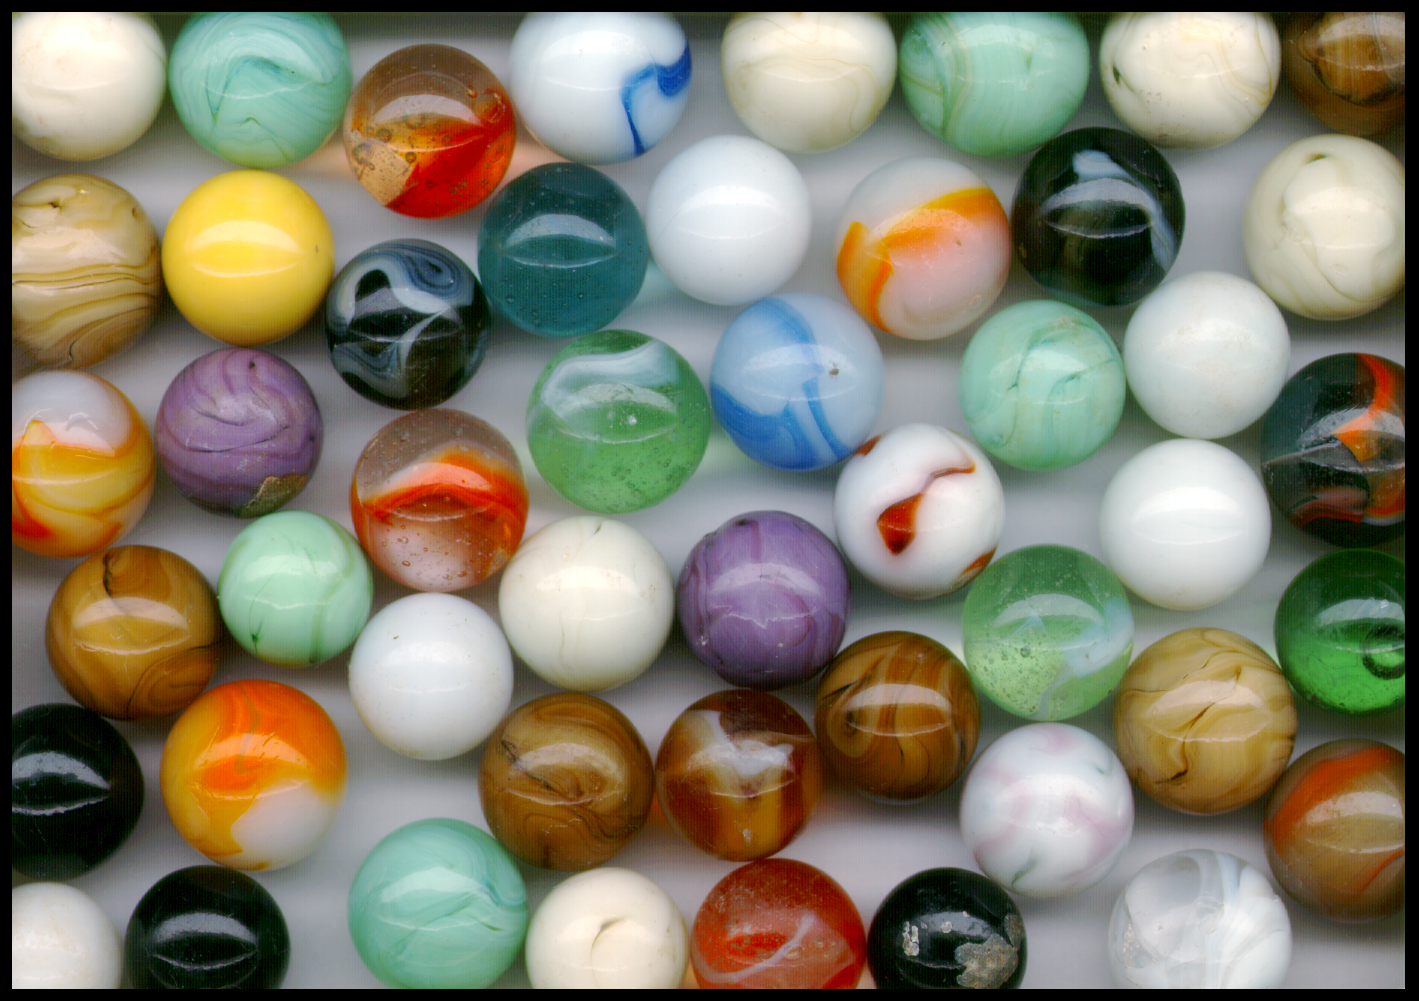

In [ ]:
 image = Image.open('marbles.BMP')
 image

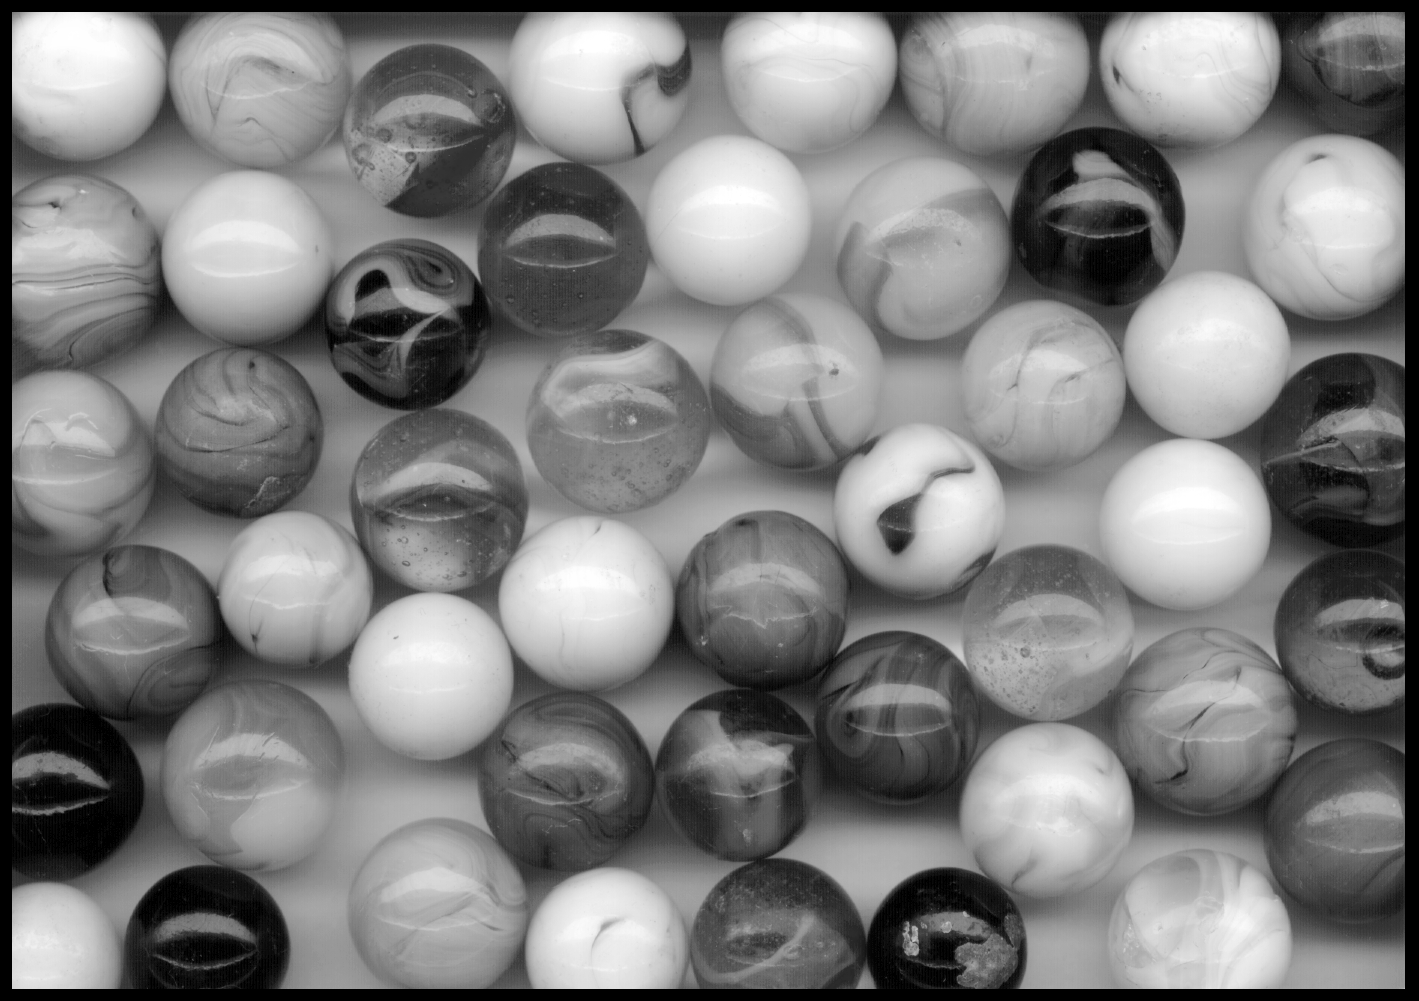

In [ ]:
img_gray = image.convert('L')
img_gray

In [ ]:
print(img_gray.size)

(1419, 1001)


In [ ]:
img_arr = np.array(img_gray)
print(img_arr)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
height  = len(img_arr) 
width = len(img_arr[0]) 
sliced = []
block = 8
print(f"Image height:{str(height)} Image width:{str(width)}")

Image height:1001 Image width:1419


**DCT**

In [ ]:
currY = 0
for i in range(block,height+1,block):
    currX = 0
    for j in range(block,width+1,block):
        sliced.append(img_arr[currY:i,currX:j]-np.ones((8,8))*128)
        currX = j
    currY = i

In [ ]:
sliced

[array([[-128., -128., -128., -128., -128., -128., -128., -128.],
        [-128., -128., -128., -128., -128., -128., -128., -128.],
        [-128., -128., -128., -128., -128., -128., -128., -128.],
        [-128., -128., -128., -128., -128., -128., -128., -128.],
        [-128., -128., -128., -128., -128., -128., -128., -128.],
        [-128., -128., -128., -128., -128., -128., -128., -128.],
        [-128., -128., -128., -128., -128., -128., -128., -128.],
        [-128., -128., -128., -128., -128., -128., -128., -128.]]),
 array([[-128., -128., -128., -128., -128., -128., -128., -128.],
        [-128., -128., -128., -128., -128., -128., -128., -128.],
        [-128., -128., -128., -128., -128., -128., -128., -128.],
        [-128., -128., -128., -128., -128., -128., -128., -128.],
        [-128., -128., -128., -128., -128., -128., -128., -128.],
        [-128., -128., -128., -128., -128., -128., -128., -128.],
        [-128., -128., -128., -128., -128., -128., -128., -128.],
        

In [ ]:
print(f"Size of the sliced image: {str(len(sliced))}")
print(f"Each element of sliced list contains a {str(sliced[0].shape)} element.")

Size of the sliced image: 22125
Each element of sliced list contains a (8, 8) element.


In [ ]:
sliced_float = [np.float32(img) for img in sliced]

In [ ]:
def DCTtransform(mat):
  pi=3.142857
  dct=[]
  for i in range(0,8):
    dct_row=[]
    for j in range(0,8):
          if (i == 0):
              ci = 1 / sqrt(8)
          else:
              ci = sqrt(2) / sqrt(8)
          if (j == 0):
              cj = 1 / sqrt(8)
          else:
              cj = sqrt(2) / sqrt(8)
          sum = 0
          for k in range(0,8):
              for l in range(0,8):
                  dct1 = mat[k][l] *cos((2 * k + 1) * i * pi / (2 * 8)) *cos((2 * l + 1) * j * pi / (2 * 8))
                  sum = sum + dct1
          dct_row.append(ci * cj * sum)
    dct.append(dct_row)
  return np.array(dct)
 

In [ ]:
DCToutput = []
for part in sliced_float:
    currDCT = DCTtransform(part)
    DCToutput.append(currDCT)

In [ ]:
DCToutput

[array([[-1.02400000e+03,  5.86344309e-01, -5.97840394e-01,
          6.17715148e-01, -6.47138083e-01,  6.87966317e-01,
         -7.43032066e-01,  8.16642103e-01],
        [ 5.86344309e-01, -3.35741845e-04,  3.42324524e-04,
         -3.53704845e-04,  3.70552473e-04, -3.93930796e-04,
          4.25461546e-04, -4.67610791e-04],
        [-5.97840394e-01,  3.42324524e-04, -3.49036267e-04,
          3.60639714e-04, -3.77817663e-04,  4.01654350e-04,
         -4.33803304e-04,  4.76778942e-04],
        [ 6.17715148e-01, -3.53704845e-04,  3.60639714e-04,
         -3.72628910e-04,  3.90377926e-04, -4.15007046e-04,
          4.48224768e-04, -4.92629099e-04],
        [-6.47138083e-01,  3.70552473e-04, -3.77817663e-04,
          3.90377926e-04, -4.08972362e-04,  4.34774613e-04,
         -4.69574557e-04,  5.16093950e-04],
        [ 6.87966317e-01, -3.93930796e-04,  4.01654350e-04,
         -4.15007046e-04,  4.34774613e-04, -4.62204740e-04,
          4.99200228e-04, -5.48654551e-04],
        [-7.4303

In [ ]:
print(f"Size of the image after applying DCT: {str(len(DCToutput))}")
print(f"Each element of DCT applied list contains a {str(DCToutput[0].shape)} element.")

Size of the image after applying DCT: 22125
Each element of DCT applied list contains a (8, 8) element.


In [ ]:
row = 0
rowNcol = []
for j in range(int(width/block),len(DCToutput)+1,int(width/block)):
    rowNcol.append(np.hstack((DCToutput[row:j])))
    row = j
res = np.vstack((rowNcol))

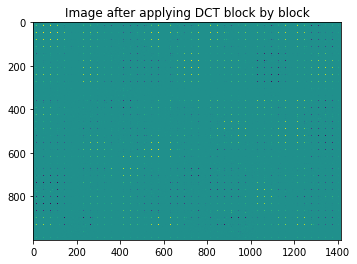

In [ ]:
plt.imshow(res,interpolation = 'nearest')
plt.title("Image after applying DCT block by block")
plt.show()

**Coefficient Quantisation**

In [ ]:
Q = np.array([[16,11,10,16,24,40,51,61],
            [12,12,14,19,26,58,60,55],
            [14,13,16,24,40,57,69,56],
            [14,17,22,29,51,87,80,62],
            [18,22,37,56,68,109,103,77],
            [24,35,55,64,81,104,113,92],
            [49,64,78,87,103,121,120,101],
            [72,92,95,98,112,100,103,99]],dtype = np.float32)

In [ ]:
Quantised_op = np.copy(DCToutput)
for ndct in Quantised_op:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]/Q[i,j])

In [ ]:
Quantised_op

array([[[-64.,   0.,  -0., ...,   0.,  -0.,   0.],
        [  0.,  -0.,   0., ...,  -0.,   0.,  -0.],
        [ -0.,   0.,  -0., ...,   0.,  -0.,   0.],
        ...,
        [  0.,  -0.,   0., ...,  -0.,   0.,  -0.],
        [ -0.,   0.,  -0., ...,   0.,  -0.,   0.],
        [  0.,  -0.,   0., ...,  -0.,   0.,  -0.]],

       [[-64.,   0.,  -0., ...,   0.,  -0.,   0.],
        [  0.,  -0.,   0., ...,  -0.,   0.,  -0.],
        [ -0.,   0.,  -0., ...,   0.,  -0.,   0.],
        ...,
        [  0.,  -0.,   0., ...,  -0.,   0.,  -0.],
        [ -0.,   0.,  -0., ...,   0.,  -0.,   0.],
        [  0.,  -0.,   0., ...,  -0.,   0.,  -0.]],

       [[-64.,   0.,  -0., ...,   0.,  -0.,   0.],
        [  0.,  -0.,   0., ...,  -0.,   0.,  -0.],
        [ -0.,   0.,  -0., ...,   0.,  -0.,   0.],
        ...,
        [  0.,  -0.,   0., ...,  -0.,   0.,  -0.],
        [ -0.,   0.,  -0., ...,   0.,  -0.,   0.],
        [  0.,  -0.,   0., ...,  -0.,   0.,  -0.]],

       ...,

       [[-64.,   0.,  -0

In [ ]:
print(f"Size of the Quantised matrix: {str(len(Quantised_op))}")
print(f"Each element of Quantised matrix contains a {str(Quantised_op[0].shape)} element")

Size of the Quantised matrix: 22125
Each element of Quantised matrix contains a (8, 8) element


In [ ]:
row = 0
rowNcol = []
for j in range(int(width/block),len(Quantised_op)+1,int(width/block)):
    rowNcol.append(np.hstack((Quantised_op[row:j])))
    row = j
res1 = np.vstack((rowNcol))

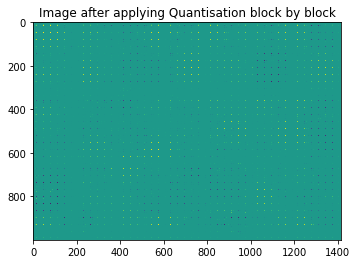

In [ ]:
plt.imshow(res1, interpolation = 'nearest')
plt.title("Image after applying Quantisation block by block")
plt.show()

Text(0.5, 1.0, 'Quantised matrix of the first 8*8 block')

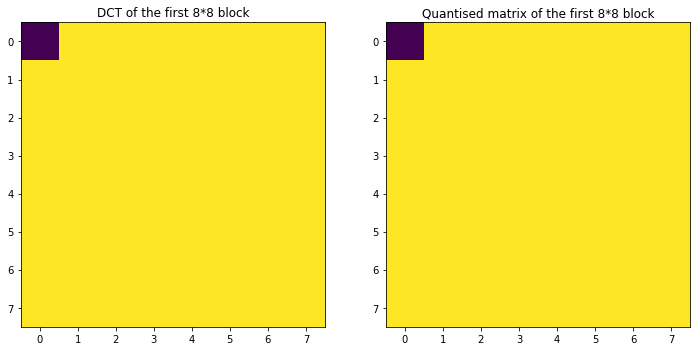

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 12))
ax[0].imshow(DCToutput[0], interpolation = 'nearest')
ax[0].set_title("DCT of the first 8*8 block")
ax[1].imshow(Quantised_op[0], interpolation = 'nearest')
ax[1].set_title("Quantised matrix of the first 8*8 block")